In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from commando import ComManDo
from commando.evaluation import test_partial
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

2022-02-23 00:33:29.244402: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-23 00:33:29.244437: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [3]:
data1 = np.loadtxt("../data/UnionCom/simu1/domain1.txt")
data2 = np.loadtxt("../data/UnionCom/simu1/domain2.txt")
type1 = np.loadtxt("../data/UnionCom/simu1/type1.txt")
type2 = np.loadtxt("../data/UnionCom/simu1/type2.txt")
type1 = type1.astype(np.int)
type2 = type2.astype(np.int)
type_func = lambda x: x

# ComManDo Partial

use random seed: 666
Shape of Raw data
Dataset 0: (300, 1000)
Dataset 1: (300, 500)
Device: cpu
---------------------------------
Find correspondence between Dataset 1 and Dataset 2
epoch:[100/2000] err:1.6447 alpha:0.6584
epoch:[200/2000] err:1.0756 alpha:0.4405
epoch:[300/2000] err:1.0785 alpha:0.4617
epoch:[400/2000] err:1.0615 alpha:0.4804
epoch:[500/2000] err:1.0320 alpha:0.4984
epoch:[600/2000] err:0.9937 alpha:0.5168
epoch:[700/2000] err:0.9436 alpha:0.5364
epoch:[800/2000] err:0.8768 alpha:0.5580
epoch:[900/2000] err:0.7976 alpha:0.5809
epoch:[1000/2000] err:0.7222 alpha:0.6023
epoch:[1100/2000] err:0.6627 alpha:0.6195
epoch:[1200/2000] err:0.6187 alpha:0.6327
epoch:[1300/2000] err:0.5845 alpha:0.6433
epoch:[1400/2000] err:0.5559 alpha:0.6523
epoch:[1500/2000] err:0.5306 alpha:0.6603
epoch:[1600/2000] err:0.5071 alpha:0.6676
epoch:[1700/2000] err:0.4846 alpha:0.6744
epoch:[1800/2000] err:0.4634 alpha:0.6808
epoch:[1900/2000] err:0.4434 alpha:0.6866
epoch:[2000/2000] err:0.4250 

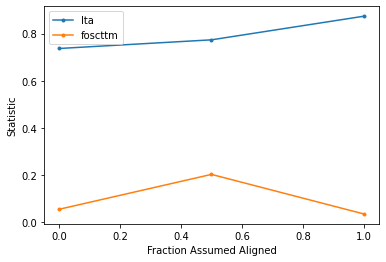

In [4]:
test_partial([data1,data2], [type1,type2]);

# ComManDo Aligned

In [5]:
cm = ComManDo()
cm_data = cm.fit_transform(dataset=[data1,data2])

use random seed: 666
Shape of Raw data
Dataset 0: (300, 1000)
Dataset 1: (300, 500)
Device: cpu
---------------------------------
Find correspondence between Dataset 1 and Dataset 2
epoch:[100/2000] err:1.6447 alpha:0.6584
epoch:[200/2000] err:1.0756 alpha:0.4405
epoch:[300/2000] err:1.0785 alpha:0.4617
epoch:[400/2000] err:1.0615 alpha:0.4804
epoch:[500/2000] err:1.0320 alpha:0.4984
epoch:[600/2000] err:0.9937 alpha:0.5168
epoch:[700/2000] err:0.9436 alpha:0.5364
epoch:[800/2000] err:0.8768 alpha:0.5580
epoch:[900/2000] err:0.7976 alpha:0.5809
epoch:[1000/2000] err:0.7222 alpha:0.6023
epoch:[1100/2000] err:0.6627 alpha:0.6195
epoch:[1200/2000] err:0.6187 alpha:0.6327
epoch:[1300/2000] err:0.5845 alpha:0.6433
epoch:[1400/2000] err:0.5559 alpha:0.6523
epoch:[1500/2000] err:0.5306 alpha:0.6603
epoch:[1600/2000] err:0.5071 alpha:0.6676
epoch:[1700/2000] err:0.4846 alpha:0.6744
epoch:[1800/2000] err:0.4634 alpha:0.6808
epoch:[1900/2000] err:0.4434 alpha:0.6866
epoch:[2000/2000] err:0.4250 

label transfer accuracy: 0.8733333333333333
foscttm: 0.03537777777777778
Inter-label distances ([1, 2, 3, 4, 5]):
[[0.        4.1028214 3.3099527 6.0373487 4.576726 ]
 [4.1028214 0.        1.6910689 6.4018826 4.879142 ]
 [3.3099527 1.6910689 0.        5.3153825 3.5506928]
 [6.0373487 6.4018826 5.3153825 0.        2.0434396]
 [4.576726  4.879142  3.5506928 2.0434396 0.       ]]


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


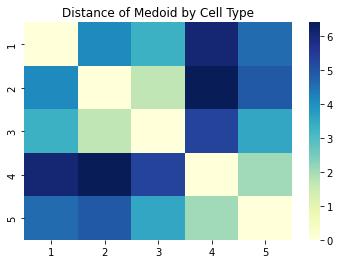

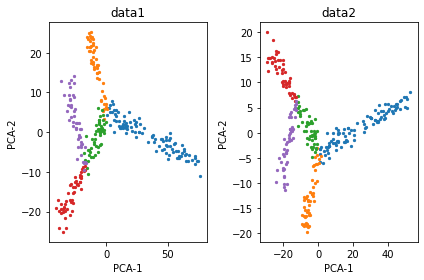

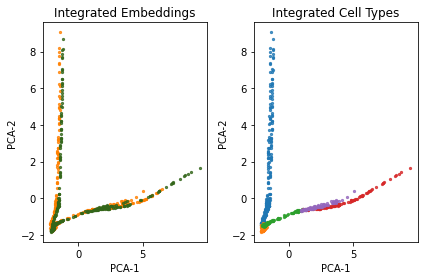

In [6]:
cm.test_LabelTA(cm_data, [type1,type2])
cm.test_closer(cm_data)
l,d = cm.test_label_dist(cm_data, [type1,type2])

l = [type_func(i) for i in l]
ax = sns.heatmap(d, xticklabels=l, yticklabels=l, linewidth=0, cmap='YlGnBu')
plt.title('Distance of Medoid by Cell Type')
cm.Visualize([data1,data2], cm_data, [type1,type2], mode='PCA')

# UnionCom Unaligned

In [7]:
uc = ComManDo(project_mode='tsne')
uc_data = uc.fit_transform(dataset=[data1,data2])

use random seed: 666
Shape of Raw data
Dataset 0: (300, 1000)
Dataset 1: (300, 500)
Device: cpu
---------------------------------
Find correspondence between Dataset 1 and Dataset 2
epoch:[100/2000] err:1.6447 alpha:0.6584
epoch:[200/2000] err:1.0756 alpha:0.4405
epoch:[300/2000] err:1.0785 alpha:0.4617
epoch:[400/2000] err:1.0615 alpha:0.4804
epoch:[500/2000] err:1.0320 alpha:0.4984
epoch:[600/2000] err:0.9937 alpha:0.5168
epoch:[700/2000] err:0.9436 alpha:0.5364
epoch:[800/2000] err:0.8768 alpha:0.5580
epoch:[900/2000] err:0.7976 alpha:0.5809
epoch:[1000/2000] err:0.7222 alpha:0.6023
epoch:[1100/2000] err:0.6627 alpha:0.6195
epoch:[1200/2000] err:0.6187 alpha:0.6327
epoch:[1300/2000] err:0.5845 alpha:0.6433
epoch:[1400/2000] err:0.5559 alpha:0.6523
epoch:[1500/2000] err:0.5306 alpha:0.6603
epoch:[1600/2000] err:0.5071 alpha:0.6676
epoch:[1700/2000] err:0.4846 alpha:0.6744
epoch:[1800/2000] err:0.4634 alpha:0.6808
epoch:[1900/2000] err:0.4434 alpha:0.6866
epoch:[2000/2000] err:0.4250 

label transfer accuracy: 0.9666666666666667
foscttm: 0.009711111111111111
Inter-label distances ([1, 2, 3, 4, 5]):
[[ 0.       15.087358 15.53436  24.327085 22.388042]
 [15.087358  0.        9.02478  19.131176 16.185959]
 [15.53436   9.02478   0.       11.554736  9.238804]
 [24.327085 19.131176 11.554736  0.        6.720115]
 [22.388042 16.185959  9.238804  6.720115  0.      ]]


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


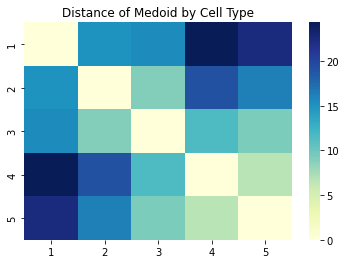

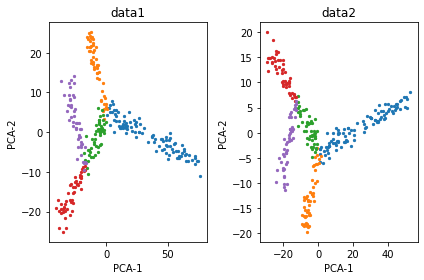

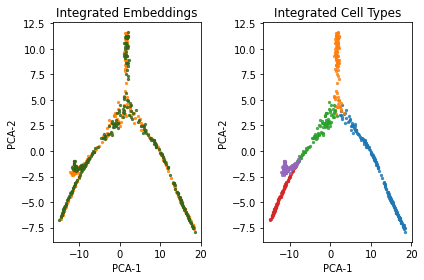

In [8]:
uc.test_LabelTA(uc_data, [type1,type2])
uc.test_closer(uc_data)
l,d = uc.test_label_dist(uc_data, [type1,type2])

l = [type_func(i) for i in l]
ax = sns.heatmap(d, xticklabels=l, yticklabels=l, linewidth=0, cmap='YlGnBu')
plt.title('Distance of Medoid by Cell Type')
uc.Visualize([data1,data2], uc_data, [type1,type2], mode='PCA')